# Imports

In [1]:
import pickle
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", context='poster')
plt.rcParams['figure.figsize'] = [20,10]
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

# Datasets

In [2]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# LSTM - pre-COVID

In [3]:
df_time_features_pre_COVID = df_time_features_pre_COVID.dropna().reset_index(drop=True)

In [4]:
df_time_features_pre_COVID

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_4,month_5,month_6,month_7,month_8,month_9,season_Fall,season_Spring,season_Summer,season_Winter
0,2.0,18.0,23.0,44.0,13.0,13.0,8.0,9.0,7.0,18.0,...,0,0,0,0,0,1,1,0,0,0
1,18.0,23.0,44.0,63.0,2.0,13.0,13.0,8.0,9.0,7.0,...,0,0,0,0,0,1,1,0,0,0
2,23.0,44.0,63.0,56.0,18.0,2.0,13.0,13.0,8.0,9.0,...,0,0,0,0,0,1,1,0,0,0
3,44.0,63.0,56.0,42.0,23.0,18.0,2.0,13.0,13.0,8.0,...,0,0,0,0,0,1,1,0,0,0
4,63.0,56.0,42.0,71.0,44.0,23.0,18.0,2.0,13.0,13.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,4789.0,4654.0,3989.0,3656.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,...,0,0,0,0,0,0,0,0,0,1
179,4654.0,3989.0,3656.0,3576.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,...,0,0,0,0,0,0,0,0,0,1
180,3989.0,3656.0,3576.0,3404.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,...,0,0,0,0,0,0,0,0,0,1
181,3656.0,3576.0,3404.0,2991.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [6]:
train_size = int(len(df_time_features_pre_COVID) *.7)
test_size = len(df_time_features_pre_COVID) - train_size
train, test = df_time_features_pre_COVID[0:train_size], df_time_features_pre_COVID[train_size:len(df_time_features_pre_COVID)]

In [7]:
train = train.iloc[:,0:1].values
train

array([[2.000e+00],
       [1.800e+01],
       [2.300e+01],
       [4.400e+01],
       [6.300e+01],
       [5.600e+01],
       [4.200e+01],
       [7.100e+01],
       [9.500e+01],
       [1.390e+02],
       [1.940e+02],
       [2.020e+02],
       [2.540e+02],
       [3.730e+02],
       [5.690e+02],
       [7.830e+02],
       [1.303e+03],
       [1.952e+03],
       [2.837e+03],
       [3.677e+03],
       [2.814e+03],
       [2.602e+03],
       [2.582e+03],
       [2.515e+03],
       [2.540e+03],
       [2.388e+03],
       [2.078e+03],
       [1.745e+03],
       [1.231e+03],
       [1.060e+03],
       [9.040e+02],
       [7.780e+02],
       [6.150e+02],
       [5.820e+02],
       [4.690e+02],
       [3.990e+02],
       [3.250e+02],
       [2.690e+02],
       [1.930e+02],
       [1.240e+02],
       [9.700e+01],
       [5.700e+01],
       [4.000e+01],
       [3.400e+01],
       [5.700e+01],
       [2.500e+01],
       [2.700e+01],
       [2.500e+01],
       [3.200e+01],
       [1.900e+01],


In [8]:
test = test.iloc[:,0:1].values
test

array([[1521.],
       [1558.],
       [1734.],
       [1759.],
       [1634.],
       [1625.],
       [1621.],
       [1593.],
       [1548.],
       [1108.],
       [ 941.],
       [ 602.],
       [ 604.],
       [ 463.],
       [ 298.],
       [ 188.],
       [ 143.],
       [ 136.],
       [ 105.],
       [  80.],
       [  53.],
       [  41.],
       [  35.],
       [  25.],
       [  31.],
       [  23.],
       [  18.],
       [  33.],
       [  28.],
       [  28.],
       [  29.],
       [  35.],
       [  37.],
       [  46.],
       [  57.],
       [  81.],
       [  81.],
       [  99.],
       [ 173.],
       [ 225.],
       [ 324.],
       [ 557.],
       [ 737.],
       [1290.],
       [2206.],
       [3126.],
       [3845.],
       [3811.],
       [3549.],
       [4182.],
       [4789.],
       [4654.],
       [3989.],
       [3656.],
       [3576.]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train)

In [10]:
training_set_scaled.shape

(128, 1)

In [11]:
training_set_scaled

array([[0.        ],
       [0.00336488],
       [0.0044164 ],
       [0.00883281],
       [0.0128286 ],
       [0.01135647],
       [0.0084122 ],
       [0.01451104],
       [0.01955836],
       [0.02881178],
       [0.04037855],
       [0.04206099],
       [0.05299685],
       [0.07802313],
       [0.1192429 ],
       [0.16424816],
       [0.27360673],
       [0.41009464],
       [0.59621451],
       [0.77287066],
       [0.5913775 ],
       [0.54679285],
       [0.54258675],
       [0.52849632],
       [0.53375394],
       [0.50178759],
       [0.43659306],
       [0.36656151],
       [0.25846477],
       [0.22250263],
       [0.18969506],
       [0.16319664],
       [0.12891693],
       [0.12197687],
       [0.09821241],
       [0.08349106],
       [0.0679285 ],
       [0.05615142],
       [0.04016824],
       [0.0256572 ],
       [0.01997897],
       [0.01156677],
       [0.00799159],
       [0.00672976],
       [0.01156677],
       [0.00483701],
       [0.00525762],
       [0.004

In [12]:
X_train = []
y_train = []

# training range, from timestep 52 to timestep 128
for i in range(7,128):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape

(121, 7)

In [14]:
y_train.shape

(121,)

In [15]:
# data needs to be in the shape [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(121, 7, 1)

In [17]:
regressor = Sequential()

#return_sequences: Boolean. Whether to return the last output. in the output sequence, or the full sequence. Default: False.
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1)) #Dropout takes 10% of neurons and automatically deactivates it. #Used to prevent overfitting 
                            #and to improve generalization of data

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 52)

Epoch 1/100
3/3 [==============================] - 4s 12ms/step - loss: 0.1299
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1061
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0796
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0690
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0717
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0648
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0576
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0527
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0549
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0524
Epoch 12/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0520
Epoch 13/100
3/3 [==============================] - 0s 

In [18]:
# actual case counts
test

array([[1521.],
       [1558.],
       [1734.],
       [1759.],
       [1634.],
       [1625.],
       [1621.],
       [1593.],
       [1548.],
       [1108.],
       [ 941.],
       [ 602.],
       [ 604.],
       [ 463.],
       [ 298.],
       [ 188.],
       [ 143.],
       [ 136.],
       [ 105.],
       [  80.],
       [  53.],
       [  41.],
       [  35.],
       [  25.],
       [  31.],
       [  23.],
       [  18.],
       [  33.],
       [  28.],
       [  28.],
       [  29.],
       [  35.],
       [  37.],
       [  46.],
       [  57.],
       [  81.],
       [  81.],
       [  99.],
       [ 173.],
       [ 225.],
       [ 324.],
       [ 557.],
       [ 737.],
       [1290.],
       [2206.],
       [3126.],
       [3845.],
       [3811.],
       [3549.],
       [4182.],
       [4789.],
       [4654.],
       [3989.],
       [3656.],
       [3576.]])

In [19]:
test.shape

(55, 1)

In [20]:
test_inputs = test.reshape(-1,1)
test_inputs = sc.transform(test_inputs)
test_inputs.shape

(55, 1)

In [21]:
test_features = []

#Test from time step 60 to time step 200, It will show 140 predicted timesteps 
for i in range(7, 55):
    test_features.append(test_inputs[i-7:i, 0])

In [22]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0],test_features.shape[1], 1))

In [23]:
test_features.shape

(48, 7, 1)

In [24]:
preds_test = regressor.predict(test_features)
preds_train = regressor.predict(X_train)

4/4 [==============================] - 0s 3ms/step


In [25]:
preds_test = sc.inverse_transform(preds_test)
preds_train = sc.inverse_transform(preds_train)

In [26]:
preds_test.shape

(48, 1)

In [27]:
preds_train.shape

(121, 1)

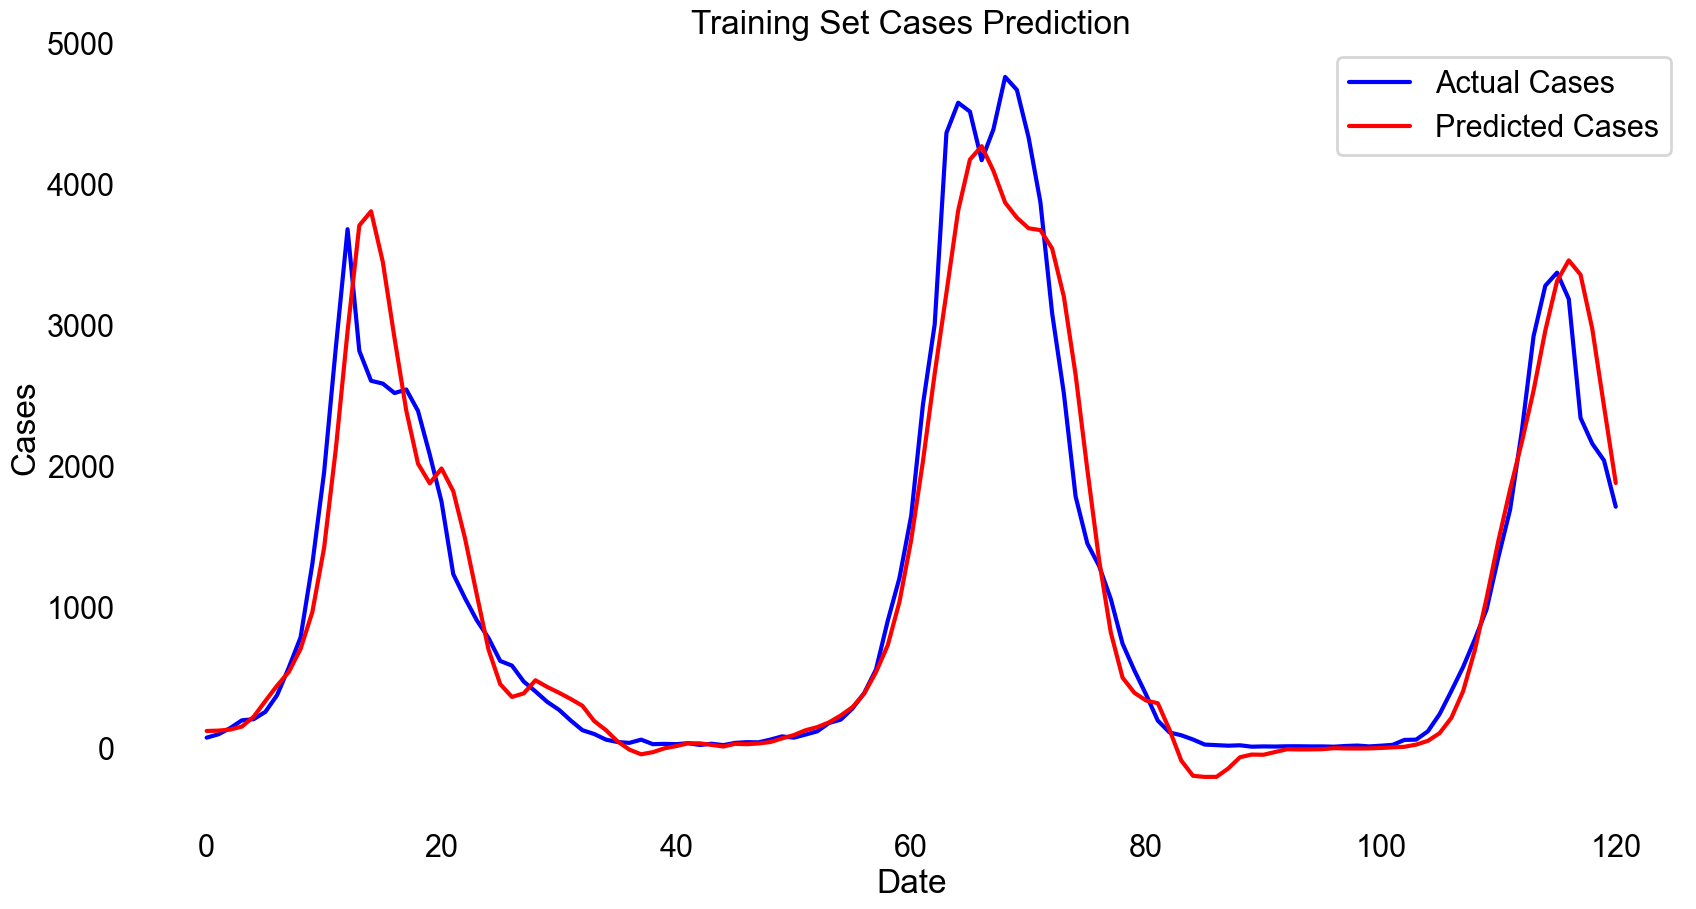

In [28]:
fig, ax = plt.subplots()
plt.plot(train[7:], color='blue', label='Actual Cases')
plt.plot(preds_train, color='red', label='Predicted Cases')
plt.title('Training Set Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

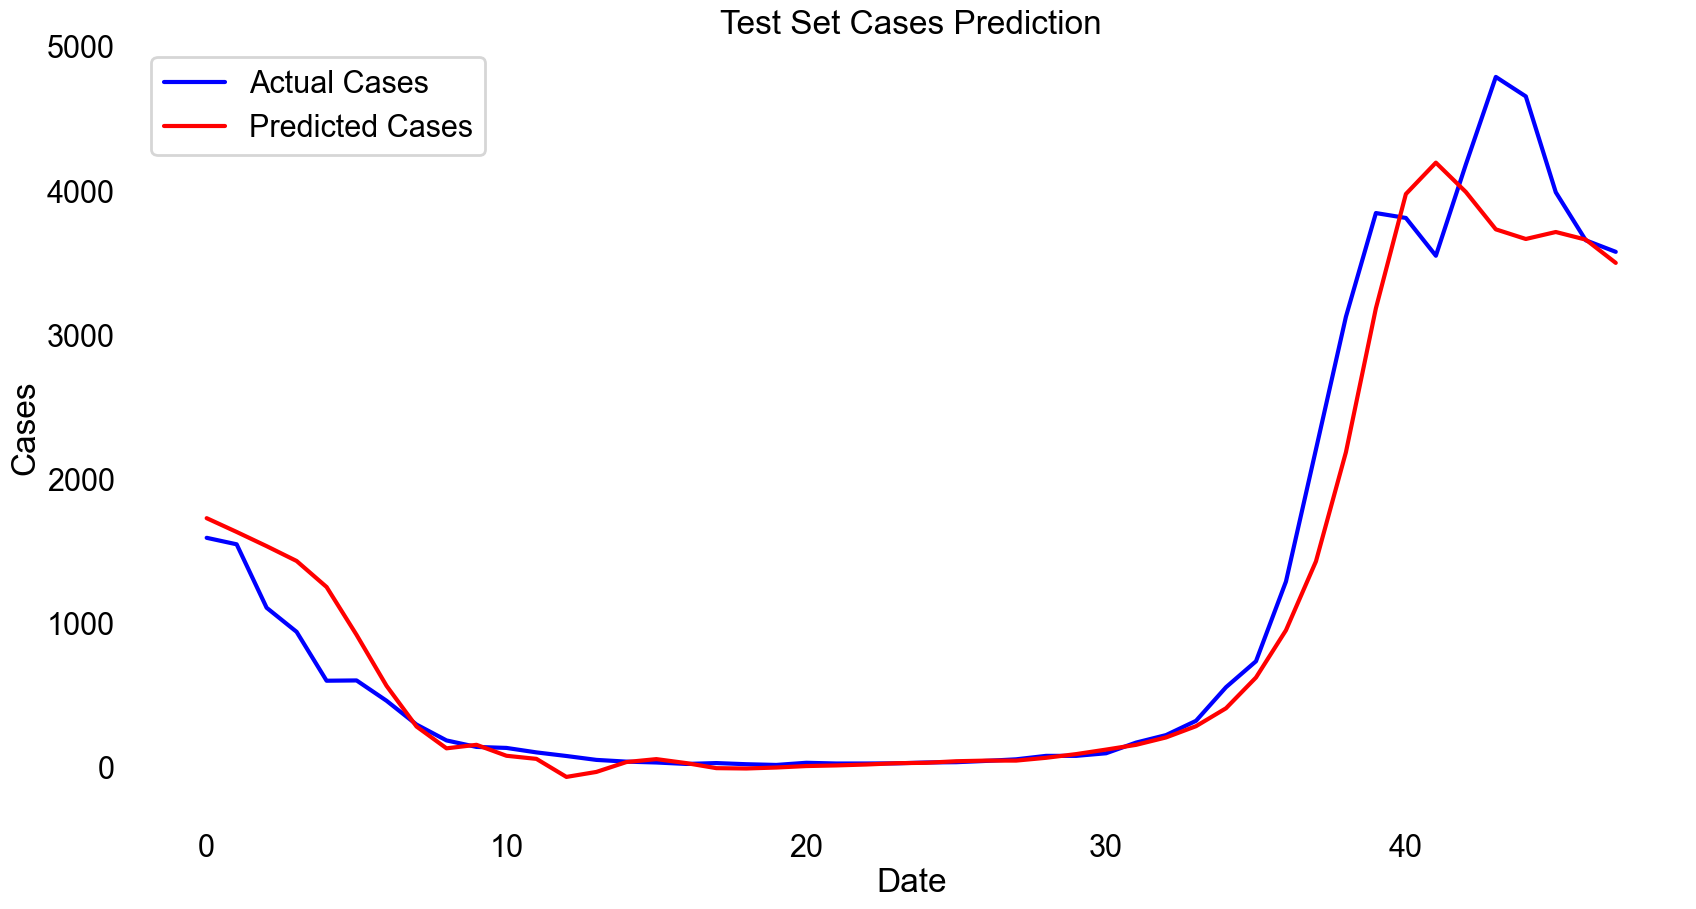

In [29]:
fig, ax = plt.subplots()
plt.plot(test[7:], color='blue', label='Actual Cases')
plt.plot(preds_test, color='red', label='Predicted Cases')
plt.title('Test Set Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [30]:
MSE_train = round(mean_squared_error(train[7:], preds_train),3)
RMSE_train = round(mean_squared_error(train[7:], preds_train, squared=False),3)
MAE_train = round(mean_absolute_error(train[7:], preds_train),3)

print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test[7:], preds_test),3)
RMSE_test = round(mean_squared_error(test[7:], preds_test, squared=False),3)
MAE_test = round(mean_absolute_error(test[7:], preds_test),3)

print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 120661.191
RMSE_train: 347.363
MAE_train: 215.116
MSE_test: 119837.249
RMSE_test: 346.175
MAE_test: 193.678
